<a href="https://colab.research.google.com/github/Venkatarameshredd/30DaysOfWebDevelopment/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1-score: 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


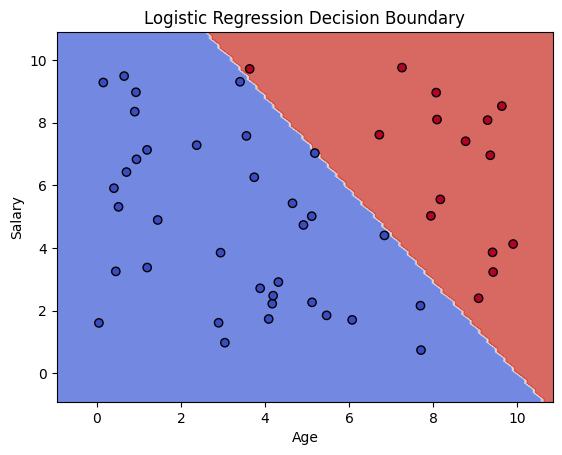

In [11]:
#Implement Logistic Regression model

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

#Generate synthetic dataset
np.random.seed(42)
samples=200
x=np.random.rand(samples,2) * 10
y=(x[:,0] * 1.5 + x[:,1] > 15).astype(int)

#create DATAFrame
df=pd.DataFrame(x,columns=['Age','Salary'])
df['purchase']=y

#split into training and test
x_train,x_test,y_train,y_test=train_test_split(df[['Age','Salary']],df['purchase'],random_state=42)

#train logistic regression model
model=LogisticRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

#Evaluate performance
print("Accuracy :",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred))
print("Recall :",recall_score(y_test,y_pred))
print("F1-score:",f1_score(y_test,y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))

#Analyze models performance
import matplotlib.pyplot as plt
#plot decision boundary
x_min, x_max=x[:,0].min()-1,x[:,0].max()+1
y_min,y_max=x[:,1].min()-1,x[:,1].max()+1
xx,yy =np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))

#predict prob for grid points
z=model.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)

#plot
plt.contourf(xx,yy,z,alpha=0.8,cmap="coolwarm")
plt.scatter(x_test['Age'],x_test['Salary'], c=y_test, edgecolor="k", cmap="coolwarm")
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()


